**Лабоаторная работа № 3**

Выполнил студент группы ББМО-02-23

**Курченко Иван Дмитриевич**

1. Установка инструментов

In [7]:
!pip install tf-keras-vis

2. Подключаем необходимые библиотеки

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 as Model

3. Загрузим 4 изобрадения и отобразим их.

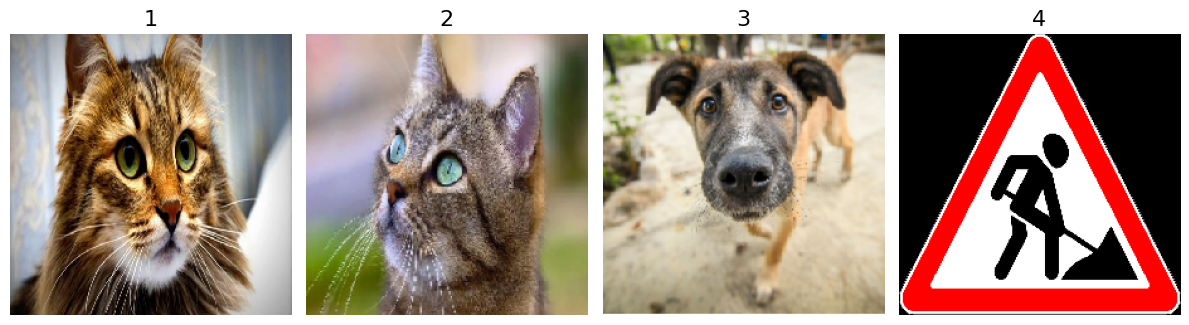

In [9]:
# Загружаем предобученную модель с весами ImageNet и включаем верхний слой (классификация)
model = Model(weights='imagenet', include_top=True)

# Список заголовков для изображений
imgTitleList = ['1', '2', '3', '4']

# Список путей к изображениям
imgPathList = ['1.jpg', '2.png', '3.png', '4.jpg']

# Загружаем изображения, изменяем их размер до 224x224 пикселей и преобразуем в массив NumPy
imgArr = np.asarray([np.array(load_img(imgPath, target_size=(224, 224))) for imgPath in imgPathList])

# Предобрабатываем изображения для подачи в модель (нормализация и изменение формата)
X = preprocess_input(imgArr)

# Создаем фигуру и оси для отображения изображений (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждого изображения
    ax[i].imshow(imgArr[i])  # Отображаем изображение на соответствующей оси
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с изображениями
plt.show()

4. ReplaceToLinear

In [10]:
# Создаем экземпляр класса ReplaceToLinear
replace2linear = ReplaceToLinear()

# Определяем функцию модификации модели
def model_modifier_function(cloned_model):
    # Меняем активацию последнего слоя модели на линейную
    cloned_model.layers[-1].activation = tf.keras.activations.linear

# Создаем объект CategoricalScore с заданными индексами классов
score = CategoricalScore([41, 42, 62, 63])

# Определяем функцию для получения оценок по выходным данным модели
def score_function(output):
    # Возвращаем значения выходного слоя для указанных индексов классов
    return (output[0][41], output[1][42], output[2][62], output[3][63])

4.1 Отобразим карты значимости

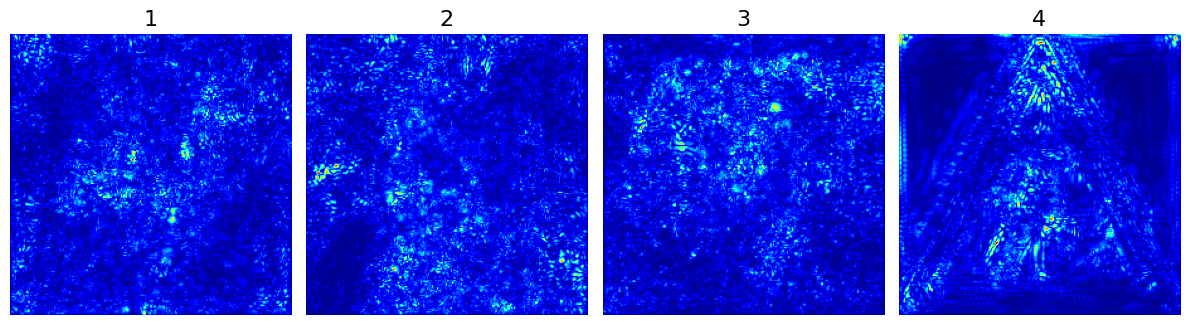

In [11]:
# Создаем объект Saliency для вычисления карты значимости
saliency = Saliency(model, model_modifier=replace2linear, clone=True)

# Вычисляем карты значимости для заданных входных данных X с использованием заданного объекта score
mapList = saliency(score, X)

# Создаем фигуру и оси для отображения карт значимости (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждой карты значимости
    ax[i].imshow(mapList[i], cmap='jet')  # Отображаем карту значимости с использованием цветовой карты 'jet'
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с картами значимости
plt.show()

5. SmoothGrad

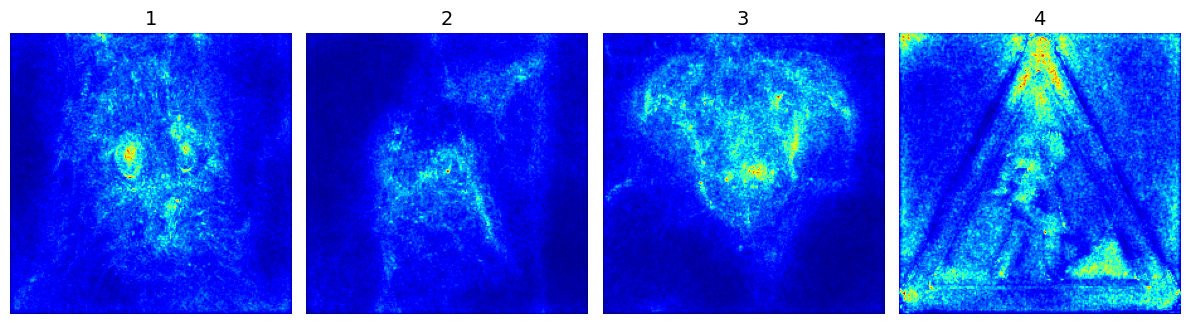

In [12]:
# Вычисляем карты значимости с использованием метода saliency, добавляя параметры для сглаживания
mapList = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

# Создаем фигуру и оси для отображения карт значимости (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=14)  # Устанавливаем заголовок для каждой карты значимости
    ax[i].imshow(mapList[i], cmap='jet')  # Отображаем карту значимости с использованием цветовой карты 'jet'
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с картами значимости
plt.show()

6. GrandCAM

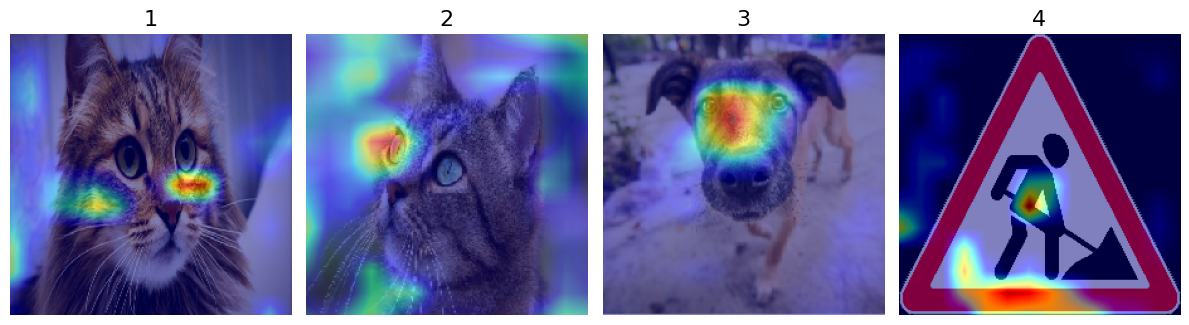

In [13]:
# Создаем объект Gradcam для вычисления карт Grad-CAM
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)

# Вычисляем карты Grad-CAM для заданных входных данных X, указывая предпоследний слой
mapList = gradcam(score, X, penultimate_layer=-1)

# Создаем фигуру и оси для отображения изображений с картами Grad-CAM (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    # Преобразуем карту значимости в формат изображения (целочисленный) с использованием цветовой карты 'jet'
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)  # Применяем цветовую карту и масштабируем значения

    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждой карты Grad-CAM
    ax[i].imshow(imgArr[i])  # Отображаем оригинальное изображение
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту на изображение с прозрачностью 0.5
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с изображениями и картами Grad-CAM
plt.show()

7. GrandCAM++

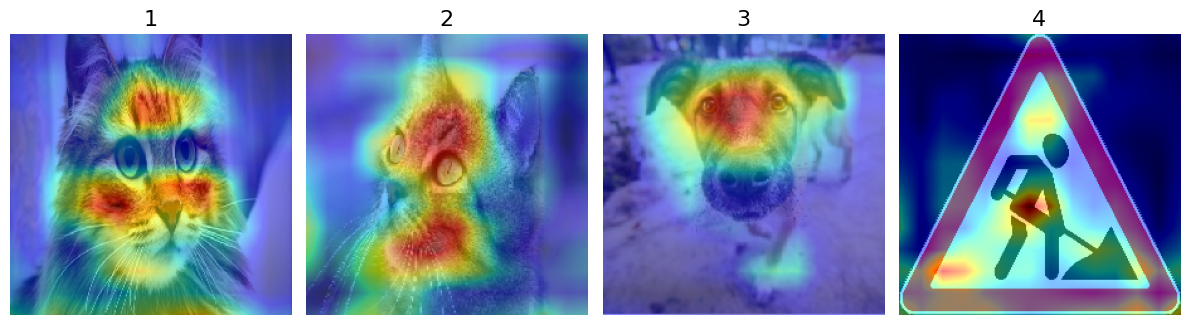

In [14]:
# Создаем объект GradcamPlusPlus для вычисления карт Grad-CAM++
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)

# Вычисляем карты Grad-CAM++ для заданных входных данных X, указывая предпоследний слой
mapList = gradcam(score, X, penultimate_layer=-1)

# Создаем фигуру и оси для отображения изображений с картами Grad-CAM++ (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    # Преобразуем карту значимости в формат изображения (целочисленный) с использованием цветовой карты 'jet'
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)  # Применяем цветовую карту и масштабируем значения

    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждой карты Grad-CAM++
    ax[i].imshow(imgArr[i])  # Отображаем оригинальное изображение
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту на изображение с прозрачностью 0.5
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с изображениями и картами Grad-CAM++
plt.show()

Вывод:
## ReplaceToLinear
Это метод, который обычно используется для упрощения сложных моделей, заменяя некоторые слои на линейные. Это может помочь в анализе и интерпретации модели, позволяя исследовать, как изменения в входных данных влияют на выходные результаты. Он часто применяется для упрощения вычислений и повышения скорости работы модели.

## SmoothGrad
Этот метод предназначен для улучшения визуализации градиентов, которые используются для объяснения предсказаний нейронных сетей. SmoothGrad добавляет небольшой шум к входным данным и усредняет результаты, чтобы сгладить визуализацию градиентов. Это помогает уменьшить шум и делает визуализацию более понятной, что позволяет лучше интерпретировать, какие части изображения влияют на предсказания модели.

## GradCAM
Gradient-weighted Class Activation Mapping (GradCAM) — это метод визуализации, который использует градиенты последнего слоя для создания тепловой карты, показывающей, какие области изображения наиболее важны для принятия решения моделью. Этот метод помогает понять, какие части изображения влияют на конкретные классы предсказаний.

## GradCAM++
Это улучшенная версия GradCAM, которая учитывает более сложные взаимодействия между классами и активностями слоев. GradCAM++ использует более точные градиенты и улучшенные методы агрегации, чтобы обеспечить более детализированные и точные тепловые карты. Этот метод позволяет лучше различать важные области в изображениях и улучшает интерпретацию результатов.